# Find the best cross-validation run

In [263]:
import pandas as pd

df = pd.read_csv('data/fold_results.csv')

# Filter rows where 'Fold' is 'Average' and 'Final Model' is not 1
average_rows = df[(df['Fold'] == 'Average') & (df['Final Model'] != 1)]

best_f1_row = average_rows.loc[average_rows['F1'].idxmax()]
best_run_id = best_f1_row['Run ID']
print(best_f1_row)

print(best_run_id)

Fold                             Average
Run ID           20240630142148_f5a1fb5c
Final Model                          0.0
Best Loss                       0.330355
Loss                            0.330355
Accuracy                        0.892593
F1                              0.894518
Num Classes                          9.0
Input Size                          12.0
Hidden Size                        100.0
Num Layers                           2.0
Output Size                          1.0
Num Epochs                         400.0
Learning Rate                     0.0004
Batch Size                          32.0
Name: 599, dtype: object
20240630142148_f5a1fb5c


In [273]:
def get_hyperparameters_for_average_run(df, run_id):
    run_data = df[df['Run ID'] == run_id]

    if not run_data.empty:
        first_row = run_data.iloc[0]
        # Extract the hyperparameters
        hyperparameters = (
            first_row['Num Classes'],
            first_row['Input Size'],
            first_row['Hidden Size'],
            first_row['Num Layers'],
            first_row['Output Size'],
            first_row['Num Epochs'],
            first_row['Learning Rate'],
            first_row['Batch Size']
        )
        return hyperparameters
    else:
        return "Run ID not found."

In [274]:
ideal_hyperparameters = get_hyperparameters_for_average_run(df, best_run_id)
print(ideal_hyperparameters)

(9.0, 12.0, 100.0, 2.0, 1.0, 400.0, 0.0004, 32.0)


In [276]:
def find_runs_with_hyperparameters(df, hyperparameters):
    num_classes, input_size, hidden_size, num_layers, output_size, num_epochs, learning_rate, batch_size = hyperparameters
    
    # Filter the DataFrame for rows matching all specified hyperparameters
    matching_runs = df[
        (df['Num Classes'] == num_classes) &
        (df['Input Size'] == input_size) &
        (df['Hidden Size'] == hidden_size) &
        (df['Num Layers'] == num_layers) &
        (df['Output Size'] == output_size) &
        (df['Num Epochs'] == num_epochs) &
        (df['Learning Rate'] == learning_rate) &
        (df['Batch Size'] == batch_size)
    ]
    
    # Extract the 'Run ID' column from the filtered DataFrame and remove duplicates
    run_ids = tuple(matching_runs['Run ID'].unique())
    
    return run_ids


hyperparameters = (9, 12, 100, 2, 1, 600, 0.000179, 32)  # Replace this with the hyperparameters you're interested in
matching_run_ids = find_runs_with_hyperparameters(df, ideal_hyperparameters)
print(matching_run_ids)

('20240630141512_d6de5016', '20240630142148_f5a1fb5c', '20240630142812_46e94cff')


# Loss Graphing

## Fold Average Losses

In [277]:
sns.set_theme(style="whitegrid", palette="pastel")

The maximum Row Index value is: 399
The maximum Row Index value is: 399


/tmp/ipykernel_2282466/2648274802.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Row Index'] = df_filtered.groupby('Fold Index').cumcount()
/tmp/ipykernel_2282466/2648274802.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Row Index'] = df_filtered.groupby('Fold Index').cumcount()
/tmp/ipykernel_2282466/2648274802.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

<Axes: xlabel='Row Index', ylabel='Mean Loss'>

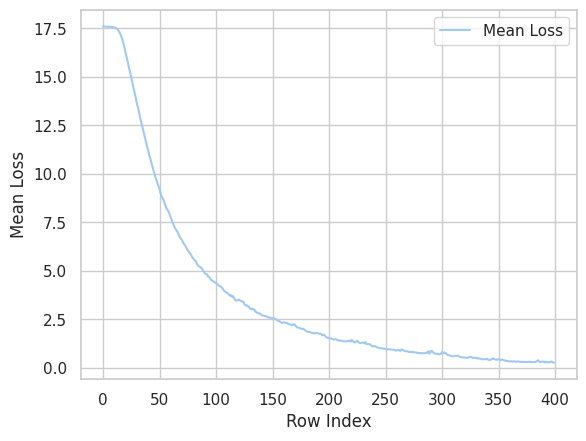

In [278]:


def get_mean_loss_stats_for_folds(run_ids):
    df = pd.read_csv("data/fold_detailed_losses.csv")
    aggregated_stats = pd.DataFrame()

    for run_id in run_ids:
        # Filter for entries with the correct 'Run ID' and not final models (Fold Index != 100)
        df_filtered = df[(df['Run ID'] == run_id) & (df['Fold Index'] != 100)]
        
        # If there are no entries after filtering, skip to the next iteration
        if df_filtered.empty:
            continue
        
        # Use groupby on 'Fold Index' and use cumcount to generate a new 'Row Index' that restarts for each fold
        df_filtered['Row Index'] = df_filtered.groupby('Fold Index').cumcount()

    # Reset index for the aggregated DataFrame
    df_filtered.reset_index(drop=True, inplace=True)
    
    return df_filtered

def calculate_mean_loss_by_index(df):
    mean_loss_by_index = df.groupby('Row Index')['Loss'].mean().reset_index()
    mean_loss_by_index.columns = ['Row Index', 'Mean Loss']
    
    return mean_loss_by_index

data = get_mean_loss_stats_for_folds(matching_run_ids)
max_row_index = data['Row Index'].max()
print(f"The maximum Row Index value is: {max_row_index}")

#print(data.head)
mean_loss_stuff = calculate_mean_loss_by_index(data)
max_row_index = mean_loss_stuff['Row Index'].max()
print(f"The maximum Row Index value is: {max_row_index}")

#print(mean_loss_stuff.head)
sns.lineplot(x='Row Index', y='Mean Loss', data=mean_loss_stuff, label='Mean Loss')

## Final-Model Average Loss

   Row Index  Mean Loss
0          0  10.994567
1          1  10.981514
2          2  10.983178
3          3  11.000769
4          4  10.992169
5          5  10.996350
6          6  10.999202
7          7  10.994676
8          8  10.972720
9          9  10.990191


/tmp/ipykernel_2282466/3270355921.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Row Index'] = range(len(df_filtered))


<Axes: xlabel='Row Index', ylabel='Mean Loss'>

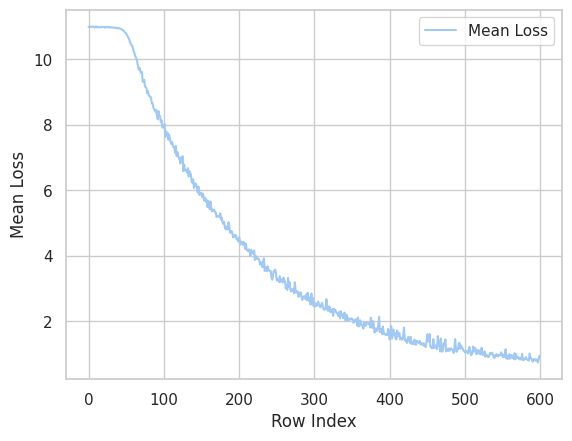

In [279]:
def extract_final_model_loss_by_run_id(run_ids):
    # Step 1: Load the CSV file into a DataFrame
    df = pd.read_csv("data/fold_detailed_losses.csv")
    
    # Initialize an empty DataFrame to store aggregated stats for all specified Run IDs
    aggregated_stats = pd.DataFrame()
    
    for run_id in run_ids:
        # Filter for only entries with the correct 'Run ID' and is a final model (Fold Index == 100)
        df_filtered = df[(df['Run ID'] == run_id) & (df['Fold Index'] == 100)]
        
        # Check if there are any entries after filtering
        if not df_filtered.empty:
            # Instead of resetting the index, create a new column for the local row index
            # This will start counting from 0 for each Run ID
            df_filtered['Row Index'] = range(len(df_filtered))
            
            # Select the necessary columns, now including the new 'Row Index'
            df_final = df_filtered[['Row Index', 'Run ID', 'Loss']]
            
            # Append the results for this Run ID to the aggregated DataFrame
            aggregated_stats = pd.concat([aggregated_stats, df_final], ignore_index=True)
    
    return aggregated_stats


final_model_loss_data_across = extract_final_model_loss_by_run_id(['20240630123146_7cd6de13'])
mean_losses = calculate_mean_loss_by_index(final_model_loss_data_across)
print(mean_losses.head(10))
sns.lineplot(x='Row Index', y='Mean Loss', data=mean_losses, label='Mean Loss')

# Metrics Graphing

## Fold Metrics

    Fold                   Run ID  Accuracy        F1
578    0  20240630141512_d6de5016  0.888889  0.885949
579    1  20240630141512_d6de5016  0.814815  0.799626
580    2  20240630141512_d6de5016  0.851852  0.853947
581    3  20240630141512_d6de5016  0.740741  0.770106
582    4  20240630141512_d6de5016  0.851852  0.860045


<Axes: xlabel='Run ID', ylabel='Accuracy'>

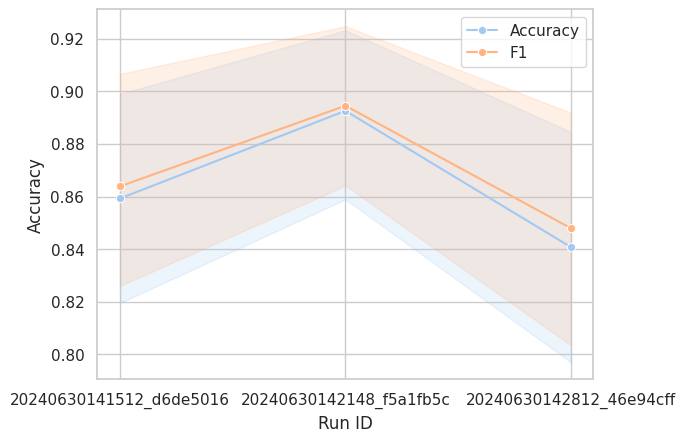

In [280]:
def get_folds_model(run_ids):
    df = pd.read_csv("data/fold_results.csv")  
    df_folds = df[df['Final Model'] != 1]
    df_filtered = df_folds[df_folds['Run ID'].isin(run_ids)]
    accuracy_data = df_filtered[['Fold', 'Run ID', 'Accuracy', 'F1']]
    
    return accuracy_data


# Example usage
accuracy_data = get_folds_model(matching_run_ids)
print(accuracy_data.head(5))
sns.lineplot(x='Run ID', y='Accuracy', data=accuracy_data, marker='o', label='Accuracy')
sns.lineplot(x='Run ID', y='F1', data=accuracy_data, marker='o', label='F1')

## Final Model Metrics

    Fold                   Run ID  Accuracy        F1
611    0  20240630142812_46e94cff   0.87027  0.871738


<Axes: xlabel='Run ID', ylabel='Accuracy'>

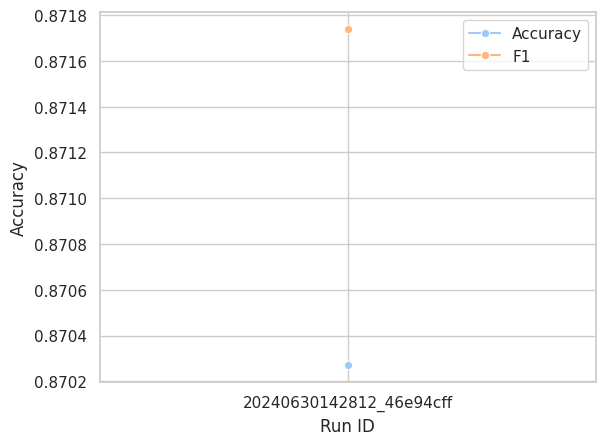

In [281]:
def get_metrics_final_model(run_ids):
    df = pd.read_csv("data/fold_results.csv")  
    df_final_models = df[df['Final Model'] == 1]
    df_filtered = df_final_models[df_final_models['Run ID'].isin(run_ids)]
    accuracy_data = df_filtered[['Fold', 'Run ID', 'Accuracy', 'F1']]
    
    return accuracy_data


# Example usage
accuracy_data = get_metrics_final_model(matching_run_ids)
print(accuracy_data.head(5))
sns.lineplot(x='Run ID', y='Accuracy', data=accuracy_data, marker='o', label='Accuracy')
sns.lineplot(x='Run ID', y='F1', data=accuracy_data, marker='o', label='F1')

# Hyperparameter Comparisons

In [258]:
# DO HYPER-PARAMETER COMPARISON

def metrics_vs_learning_rate():
    df = pd.read_csv("data/fold_results.csv")
    df_average = df[df['Fold'] == 'Average']
    df_lr = df_average[['Learning Rate', 'F1', 'Accuracy']]
    
    return df_lr

def metrics_vs_hidden_size():
    df = pd.read_csv("data/fold_results.csv")
    df_average = df[df['Fold'] == 'Average']
    df_hs = df_average[['Hidden Size', 'F1', 'Accuracy']]
    
    return df_hs

def metrics_vs_epochs():
    df = pd.read_csv("data/fold_results.csv")
    df_average = df[df['Fold'] == 'Average']
    df_ep = df_average[['Num Epochs', 'F1', 'Accuracy']]
    
    return df_ep

def metrics_vs_batch_size():
    df = pd.read_csv("data/fold_results.csv")
    df_average = df[df['Fold'] == 'Average']
    df_bs = df_average[['Batch Size', 'F1', 'Accuracy']]
    
    return df_bs

def make_graph(data, x, name):
    color_weighted_f1 = '#0072B2'  # Blue
    color_accuracy = '#D55E00'  # Red
        
    long_data = pd.melt(data, id_vars=[x], value_vars=['F1', 'Accuracy'], var_name='Metric', value_name='Value')
    long_data['Metric'] = long_data['Metric'].replace({'F1': 'Weighted F1'})
    
    sns.set_style("white")
    
    g = sns.JointGrid(data=long_data, x=x, y='Value', height=8, ratio=4)
    
    # Plot KDE and scatter in the joint area
    sns.kdeplot(data=long_data, x=x, y='Value', ax=g.ax_joint, zorder=0, levels=6, hue='Metric', 
                palette={'Weighted F1': color_weighted_f1, 'Accuracy': color_accuracy}, alpha=0.5)
    sns.scatterplot(data=long_data, x=x, y='Value', hue='Metric', ax=g.ax_joint, 
                    palette={'Weighted F1': color_weighted_f1, 'Accuracy': color_accuracy})
    
    # Plot KDE for 'Value' on the side
    for metric in long_data['Metric'].unique():
        subset = long_data[long_data['Metric'] == metric]
        sns.kdeplot(y=subset['Value'], ax=g.ax_marg_y, fill=True, alpha=0.5, 
                    color=color_weighted_f1 if metric == 'Weighted F1' else color_accuracy)
    
    # Plot KDE for 'x' on the top, adjusting bandwidth as needed
    for metric, color in zip(['Weighted F1', 'Accuracy'], [color_weighted_f1, color_accuracy]):
        subset = long_data[long_data['Metric'] == metric]
        sns.kdeplot(x=subset[x], ax=g.ax_marg_x, fill=True, alpha=0.5, color=color, bw_adjust=0.75)
    
    g.ax_joint.grid(False)
    sns.despine()
    g.ax_joint.legend(title='Metric', loc='lower right')
    plt.tight_layout()
    plt.savefig(name + '.png')

## Learning Rate per Folds

In [255]:
f1_tuning = metrics_vs_learning_rate()

print(f1_tuning.head(5))
#sns.lineplot(x='Learning Rate', y='F1', data=f1_tuning, marker='o', label='Mean Loss')

#sns.jointplot(x='Learning Rate', y='F1', data=f1_tuning, kind="kde", color="#4CB391")
#sns.jointplot(x='Learning Rate', y='Accuracy', data=f1_tuning, kind="kde", color="#4CB391")




    Learning Rate        F1  Accuracy
10       0.000179  0.881710  0.874074
22       0.000058  0.661093  0.670370
34       0.000200  0.839489  0.837037
46       0.000170  0.823380  0.829630
58       0.000165  0.842551  0.840741


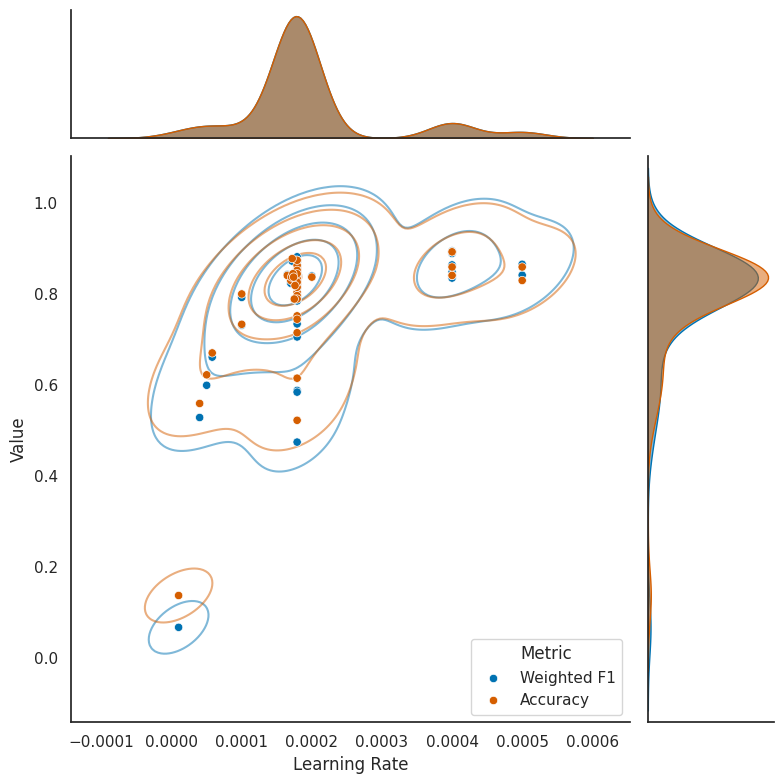

In [259]:
make_graph(f1_tuning, x='Learning Rate', name="LR")

## Hidden Size per Folds

    Hidden Size        F1  Accuracy
10        100.0  0.881710  0.874074
22        100.0  0.661093  0.670370
34        100.0  0.839489  0.837037
46        100.0  0.823380  0.829630
58        100.0  0.842551  0.840741


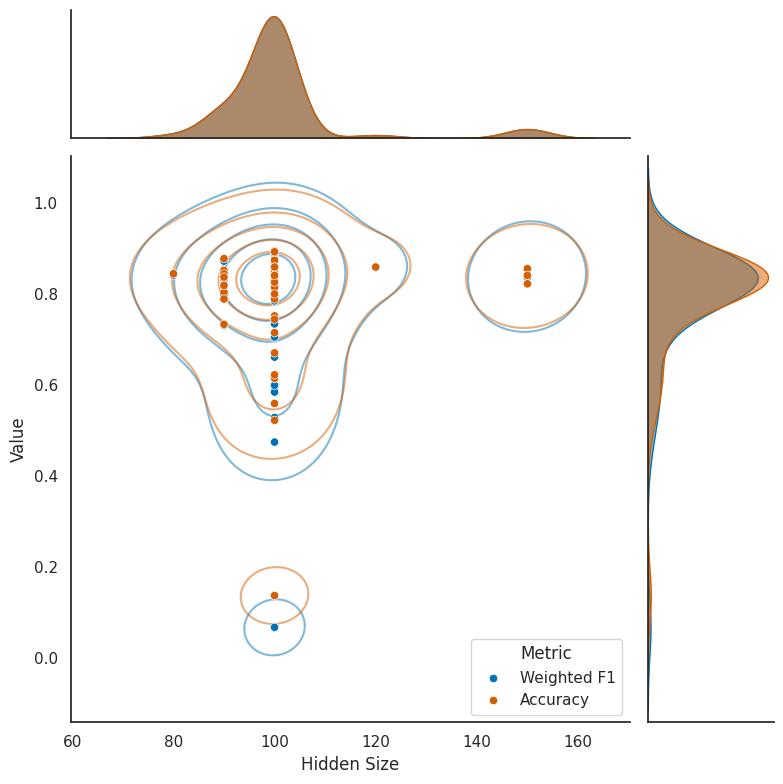

In [260]:
hidden_size_data = metrics_vs_hidden_size()
print(hidden_size_data.head(5))
make_graph(hidden_size_data, x='Hidden Size', name="HS")
#sns.jointplot(x='Hidden Size', y='F1', data=hidden_size_data, kind="hex", color="#4CB391")
#sns.jointplot(x='Hidden Size', y='Accuracy', data=hidden_size_data, kind="hex", color="#4CB391")

## Epochs per Folds

    Hidden Size        F1  Accuracy
10        100.0  0.881710  0.874074
22        100.0  0.661093  0.670370
34        100.0  0.839489  0.837037
46        100.0  0.823380  0.829630
58        100.0  0.842551  0.840741


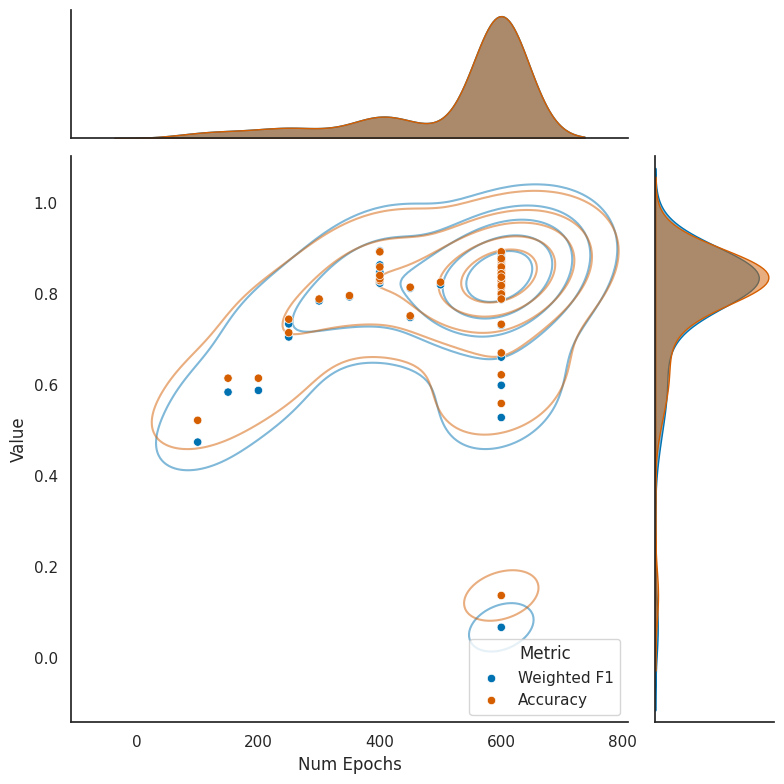

In [261]:
epoch_data = metrics_vs_epochs()
print(hidden_size_data.head(5))
make_graph(epoch_data, x='Num Epochs', name="EP")
#sns.jointplot(x='Num Epochs', y='F1', data=epoch_data, kind="hex", color="#4CB391")
#sns.jointplot(x='Num Epochs', y='Accuracy', data=epoch_data, kind="hex", color="#4CB391")

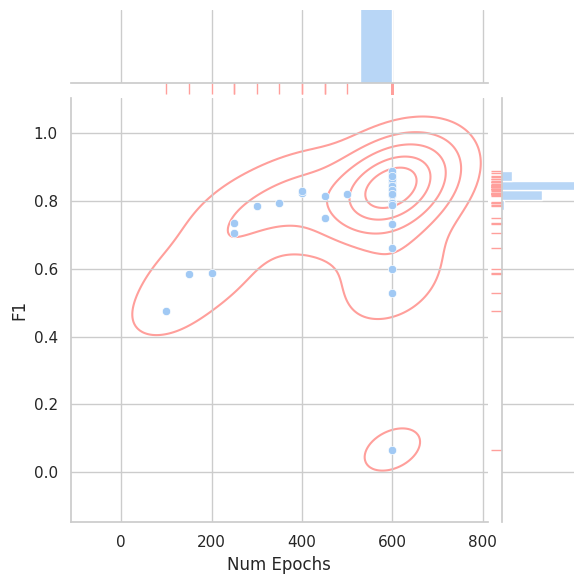

In [207]:
#g = sns.jointplot(data=epoch_data, x="Num Epochs", y="F1")
#g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
#g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

## Batch Size per Folds

    Batch Size        F1  Accuracy
10        32.0  0.881710  0.874074
22        32.0  0.661093  0.670370
34        32.0  0.839489  0.837037
46        32.0  0.823380  0.829630
58        32.0  0.842551  0.840741


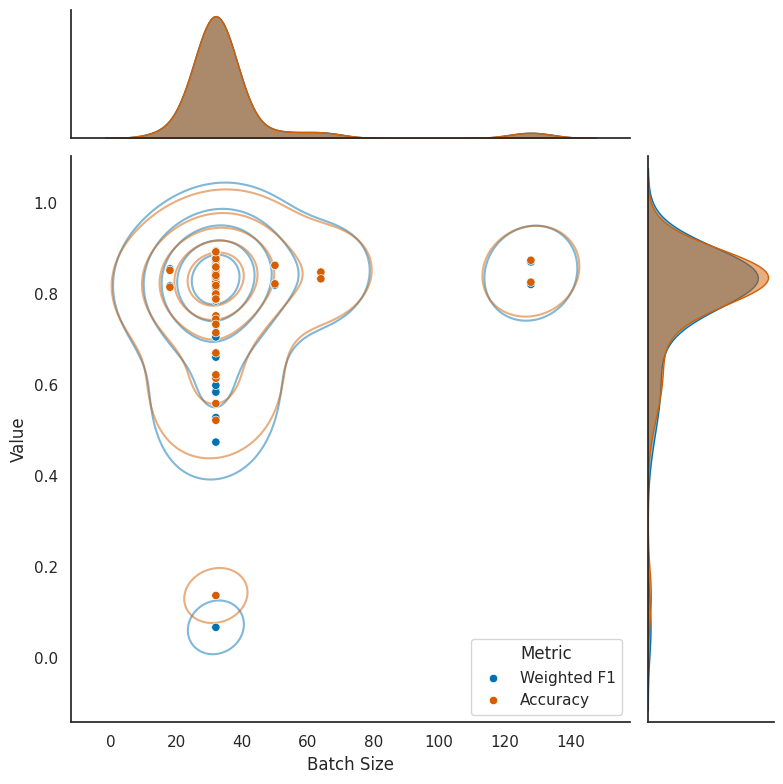

In [262]:
batch_data = metrics_vs_batch_size()
print(batch_data.head(5))
make_graph(batch_data, x='Batch Size', name="BS")
#sns.jointplot(x='Batch Size', y='F1', data=batch_data, kind="hex", color="#4CB391")
#sns.jointplot(x='Batch Size', y='Accuracy', data=batch_data, kind="hex", color="#4CB391")